In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv("E:\Data_mites_projects\PRCL-0017 Customer Churn Business case\customer_chrun.csv")
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.shape

(4617, 21)

In [4]:
# Define the new column names
new_columns = [
    "State",
    "Account Length",
    "Area Code",
    "Phone",
    "International Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "International Mins",
    "International Calls",
    "International Charge",
    "CustServ Calls",
    "Churn"
]

# Replace the column names
df.columns = new_columns


In [5]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df=df.drop_duplicates()
df.shape

(4617, 21)

In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


NO duplicates where found so nothing was removed

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [9]:
### For phone number column there number where we have different symbols in between it like mobile number then use below formate to remove uncessary stuff.
df['Phone'].str.replace('[â-zA-z0-9]','')

0        382-4657
1        371-7191
2        358-1921
3        375-9999
4        330-6626
          ...    
4612     345-7512
4613     343-6820
4614     338-4794
4615     355-8388
4616     409-6884
Name: Phone, Length: 4617, dtype: object

In [10]:
# Function to extract numeric digits
def extract_numbers(text):
  return re.sub(r'\D', '', text)

# Apply the function to the 'Phone' column
df['Phone']=df['Phone'].apply(extract_numbers)
print(df)


     State  Account Length  Area Code    Phone International Plan VMail Plan  \
0       KS             128        415  3824657                 no        yes   
1       OH             107        415  3717191                 no        yes   
2       NJ             137        415  3581921                 no         no   
3       OH              84        408  3759999                yes         no   
4       OK              75        415  3306626                yes         no   
...    ...             ...        ...      ...                ...        ...   
4612    NY              57        510  3457512                 no        yes   
4613    NM             177        408  3436820                 no        yes   
4614    VT              67        408  3384794                 no        yes   
4615    MI              98        415  3558388                 no        yes   
4616    IN             140        415  4096884                 no         no   

      VMail Message  Day Mins  Day Call

In [11]:
df.head

<bound method NDFrame.head of      State  Account Length  Area Code    Phone International Plan VMail Plan  \
0       KS             128        415  3824657                 no        yes   
1       OH             107        415  3717191                 no        yes   
2       NJ             137        415  3581921                 no         no   
3       OH              84        408  3759999                yes         no   
4       OK              75        415  3306626                yes         no   
...    ...             ...        ...      ...                ...        ...   
4612    NY              57        510  3457512                 no        yes   
4613    NM             177        408  3436820                 no        yes   
4614    VT              67        408  3384794                 no        yes   
4615    MI              98        415  3558388                 no        yes   
4616    IN             140        415  4096884                 no         no   

      VMa

In [12]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
int64
object
object
object
int64
float64
int64
float64
float64
int64
float64
float64
int64
float64
float64
int64
float64
int64
object


In [13]:
#Checking for null values
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [14]:
data=df.copy()

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [16]:
df

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,OH,107,415,3717191,no,yes,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,NJ,137,415,3581921,no,no,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,OH,84,408,3759999,yes,no,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,OK,75,415,3306626,yes,no,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,3457512,no,yes,25,144.00,81,24.48,...,112,15.91,158.60,122,7.14,8.50,6,2.30,3,False.
4613,NM,177,408,3436820,no,yes,29,189.00,91,32.13,...,96,25.76,163.60,116,7.36,15.70,1,4.24,3,False.
4614,VT,67,408,3384794,no,yes,33,127.50,126,21.68,...,129,25.17,200.90,91,9.04,13.00,3,3.51,1,False.
4615,MI,98,415,3558388,no,yes,23,168.90,98,28.71,...,117,19.24,165.50,96,7.45,14.30,3,3.86,0,False.


# EDA

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [18]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00
mean,100.65,437.05,7.85,180.45,100.05,30.68,200.43,100.18,17.04,200.62,99.94,9.03,10.28,4.43,2.78,1.57
std,39.60,42.29,13.59,53.98,19.88,9.18,50.56,19.82,4.30,50.54,19.94,2.27,2.76,2.46,0.74,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,12.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,165.90,87.00,14.10,167.10,87.00,7.52,8.60,3.00,2.32,1.00
50%,100.00,415.00,0.00,180.00,100.00,30.60,200.80,101.00,17.07,200.80,100.00,9.04,10.30,4.00,2.78,1.00
75%,127.00,510.00,17.00,216.80,113.00,36.86,234.00,114.00,19.89,234.90,113.00,10.57,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,351.50,165.00,59.76,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [19]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [20]:
data.nunique()

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International Calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [21]:
data.corr(numeric_only=True)

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
Account Length,1.00,-0.02,-0.01,0.00,0.03,0.00,-0.01,0.02,-0.01,-0.00,-0.01,-0.00,0.00,0.02,0.00,0.00
Area Code,-0.02,1.00,-0.00,-0.02,-0.01,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.01,-0.01,0.02
VMail Message,-0.01,-0.00,1.00,0.01,-0.00,0.01,0.02,-0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.01,-0.01
Day Mins,0.00,-0.02,0.01,1.00,-0.00,1.00,-0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01
Day Calls,0.03,-0.01,-0.00,-0.00,1.00,-0.00,-0.01,0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.01,-0.01
Day Charge,0.00,-0.02,0.01,1.00,-0.00,1.00,-0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01
Eve Mins,-0.01,0.01,0.02,-0.01,-0.01,-0.01,1.00,0.00,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.02
Eve Calls,0.02,-0.01,-0.01,0.01,0.00,0.01,0.00,1.00,0.00,0.00,-0.02,0.00,-0.00,0.01,-0.00,0.01
Eve Charge,-0.01,0.01,0.02,-0.01,-0.01,-0.01,1.00,0.00,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.02
Night Mins,-0.00,0.00,0.00,0.01,0.01,0.01,-0.02,0.00,-0.02,1.00,0.03,1.00,-0.00,-0.01,-0.00,-0.01


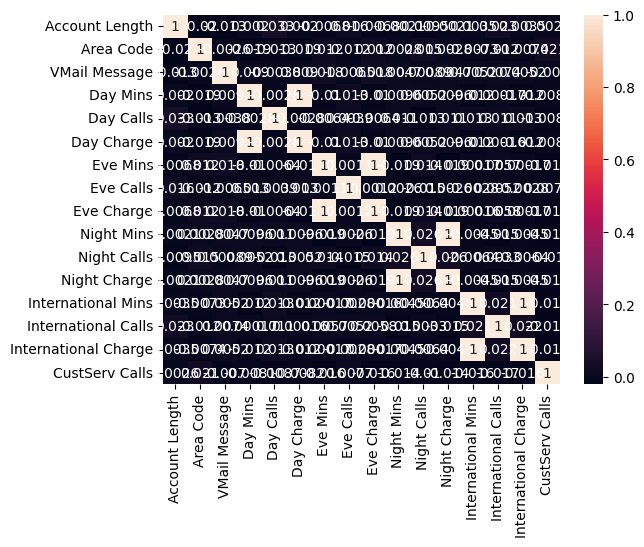

In [22]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(15,15)
plt.show()

In [23]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       State  Account Length  Area Code    Phone International Plan  \
count   4617         4617.00    4617.00     4617               4617   
unique    51             NaN        NaN     4617                  2   
top       WV             NaN        NaN  3824657                 no   
freq     149             NaN        NaN        1               4171   
mean     NaN          100.65     437.05      NaN                NaN   
std      NaN           39.60      42.29      NaN                NaN   
min      NaN            1.00     408.00      NaN                NaN   
25%      NaN           74.00     408.00      NaN                NaN   
50%      NaN          100.00     415.00      NaN                NaN   
75%      NaN          127.00     510.00      NaN                NaN   
max      NaN          243.00     510.00      NaN                NaN   

       VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
count        4617        4617.00   4617.00    4617.00     4617.00  ...   

In [24]:
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces


In [25]:
## removing the column,Columns like Phone don't not contribute meaningfully to analysis.
data = data.drop(['Phone'], axis=1)


In [26]:
data['International Plan'] = data['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['VMail Plan'] = data['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['State'] = data['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

1. For Binary Columns:
Columns like 'International Plan' and 'VMail Plan' (e.g., 'Yes' and 'No'):
Use Label Encoding:

In [29]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data[col] = LabelEncoder().fit_transform(data[col])

2. For Multi-Class Columns with No Ordinal Relationship:
Columns like 'State' (e.g., 'NY', 'CA', 'TX'):
Use Frequency Encoding


In [30]:
# Frequency Encoding
for col in ['State']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

3. For High-Cardinality Columns:
If a column like 'Phone' or 'State' has many unique values:
Prefering Frequency Encoding to prevent complexity.
Why These Methods Suit me?

Label Encoding:

Fits columns like 'International Plan' and 'VMail Plan' that are binary.
Simple, avoids data expansion, and ensures no increase in column count.

Frequency Encoding:

Encodes the significance of categories based on their occurrence.
Fits high-cardinality columns like 'State' without increasing the column count.

In [31]:
data.head(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.
5,0.02,118,510,1,0,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0,False.
6,0.02,121,510,0,1,24,218.20,88,37.09,348.50,108,29.62,212.60,118,9.57,7.50,7,2.03,3,False.
7,0.02,147,415,1,0,0,157.00,79,26.69,103.10,94,8.76,211.80,96,9.53,7.10,6,1.92,0,False.
8,0.02,117,408,0,0,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,False.
9,0.03,141,415,1,1,37,258.60,84,43.96,222.00,111,18.87,326.40,97,14.69,11.20,5,3.02,0,False.


In [32]:
data.tail(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
4597,0.02,65,408,1,0,0,54.80,74,9.32,239.80,93,20.38,214.40,91,9.65,13.40,5,3.62,1,True.
4598,0.02,57,415,0,1,24,140.20,102,23.83,170.10,107,14.46,143.70,102,6.47,14.00,1,3.78,1,False.
4599,0.02,127,408,0,0,0,271.20,110,46.10,213.50,80,18.15,201.80,102,9.08,13.20,4,3.56,0,True.
4600,0.01,121,415,0,0,0,180.00,116,30.60,196.40,112,16.69,280.30,95,12.61,10.10,5,2.73,2,False.
4601,0.02,117,415,0,0,0,189.80,122,32.27,235.60,94,20.03,270.80,120,12.19,12.70,2,3.43,1,False.
4602,0.02,37,408,0,0,0,257.30,117,43.74,134.50,92,11.43,306.20,102,13.78,8.20,5,2.21,3,False.
4603,0.02,162,510,0,0,0,103.30,93,17.56,210.60,87,17.90,187.20,118,8.42,11.40,6,3.08,1,False.
4604,0.02,193,415,0,0,0,208.10,115,35.38,178.00,104,15.13,195.90,95,8.82,12.40,9,3.35,3,False.
4605,0.02,80,415,0,0,0,195.10,65,33.17,214.00,80,18.19,124.40,96,5.60,9.20,6,2.48,2,False.
4606,0.03,176,415,0,0,0,162.60,97,27.64,227.80,107,19.36,218.80,92,9.85,11.30,4,3.05,1,False.


In [35]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [38]:
# Convert 'True' and 'False' to 1 and 0, respectively
data['Chrun']=data['Churn'].map({' True.': 1, ' False.': 0})

In [39]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,16.78,244.70,91,11.01,10.00,3,2.70,1,False.,0
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,16.62,254.40,103,11.45,13.70,3,3.70,1,False.,0
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,10.30,162.60,104,7.32,12.20,5,3.29,0,False.,0
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,...,5.26,196.90,89,8.86,6.60,7,1.78,2,False.,0
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,12.61,186.90,121,8.41,10.10,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.02,57,510,0,1,25,144.00,81,24.48,187.20,...,15.91,158.60,122,7.14,8.50,6,2.30,3,False.,0
4613,0.02,177,408,0,1,29,189.00,91,32.13,303.10,...,25.76,163.60,116,7.36,15.70,1,4.24,3,False.,0
4614,0.02,67,408,0,1,33,127.50,126,21.68,296.10,...,25.17,200.90,91,9.04,13.00,3,3.51,1,False.,0
4615,0.02,98,415,0,1,23,168.90,98,28.71,226.30,...,19.24,165.50,96,7.45,14.30,3,3.86,0,False.,0


In [ ]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
# Create separate DataFrames for features (X) and target (y)
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target

# Convert target to numeric (assuming 'False' and 'True' values)
y = y.map({'False': 0, 'True': 1})

# Print the first few rows of the target variable (y)
print(y.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Churn, dtype: float64


The error ValueError: Input y contains NaN indicates that your target variable y contains missing values (NaN). SMOTE requires both features (X) and the target (y) to be free of missing values. Here’s how you can address this step-by-step:

We can use the regression model to fill the nan value

In [ ]:
# Check for missing values in the target variable
print(y.isnull().sum())
y.head()


4617


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Churn, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


c:\Users\user\Python39\lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

Step 1: Univariate Analysis
Categorical columns

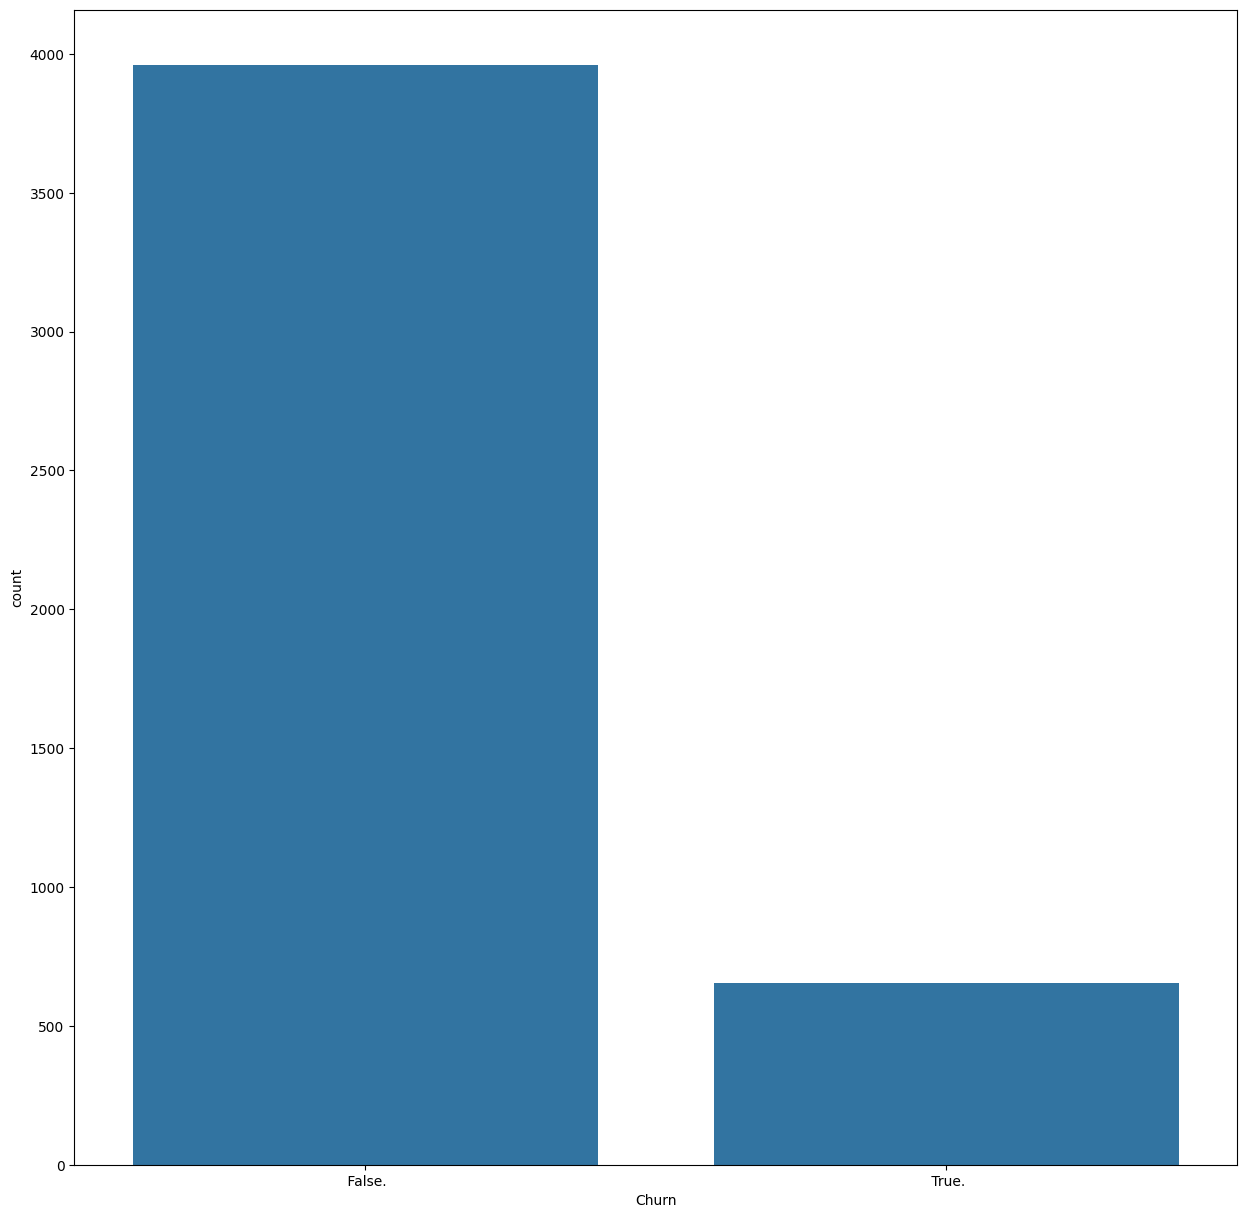

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=data)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


ValueError: could not convert string to float: 'KS'